# CSED490B - Assignment 4

### Submission guideline

- You should upload this jupyter notebook file
- Change the filename to your_student_id.ipynb (e.g., 20211234.ipynb)
- Any violation in the submission format may bring 5% penalty.

### Due: 23:59, December 26

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as ss

# You can import more functions from numpy and scipy - do not use any other libraries

## Principal Component Analysis

In this assignment, you will first implement the principal component analysis. From the lectures, we learned that the PCA is useful to reduce the dimensionality of the dataset.

Let's first load the prepared dataset.

In [2]:
X = np.load('PCA_dataset.npy')
N, D = X.shape

Let's have a look at the data points.

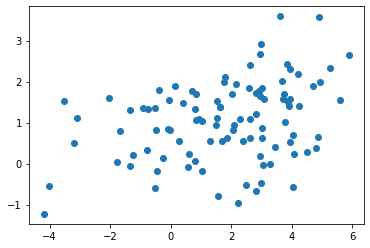

In [3]:
plt.scatter(X[:,0], X[:,1])

If you remember the PCA algorithm consists of the following steps:

1. Normalize dataset in order to make the mean of each feature to 0 and the standard deviation to 1
2. Compute the data covariance matrix $S$
3. Compute the first $k$-eigenvectors (principal components) corresponding to the highest $k$-eigenvalues
4. Project the data points onto the principal components (compute $z_n$ for each $x_n$)

### Question1: Data normalization (20pt)

Your first job is to normalize the dataset. Implement the following function to normalize. Your return must have the shape of [N x D].

In [4]:
def normalize(X):
    """
    Return normalized dataset X.
    
    Parameters
    ----------
    X : dataset with shape (dimension) [N x D], where N is the number 
        of data points and D is the number of features.
    """
    
    # Implement the missing part of this code
    normalized_X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)
    
    return normalized_X

Let's visualize your dataset again. Is it normalized well?

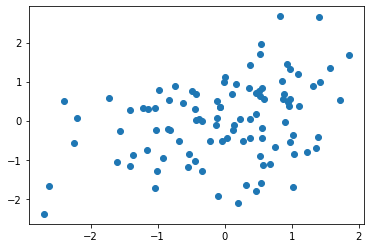

In [5]:
# do not modify the code
normalized_X = normalize(X)
plt.scatter(normalized_X[:,0], normalized_X[:,1])

### Question2: PCA  (20pt)

Implement the third and fourth steps of PCA. Note that the data covariance matrix $S$ is computed in the code. If your implementation is correct, you need to return two matrices: `Z` and `B` (following the notations in the lecture slides). The shape of `Z` must be [N x K] and `B` be [D x K], where K is the number of principle components we set.

In [6]:
def PCA(X, k):
    """
    Perform PCA for dataset X. You need to return Z and B (check the description above).
    
    Parameters
    ----------
    X : normalized dataset with shape [N x D]
    k : the number of principal components we use
    """
    num_data, num_dim = X.shape
    S = (1./X.shape[0]) * X.T @ X #data covriance matrix
    
    # implement the missing part of this method
    #print(X)
    evalue, evec = np.linalg.eig(S)
    idx = evalue.argsort()[::-1]
    B = np.empty((0, 2))
    for i in range(len(idx)):
        if i == k:
            break
        B = np.append(B, np.array([evec[:, idx[i]]]), axis = 0)
    B = np.transpose(B)
    Z = np.dot(X, B)
    
    return Z, B

Let's have a look at how your data points spread after projecting onto the first PC.

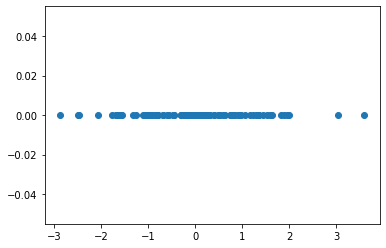

In [7]:
# do not modify the code
K = 1
coeff, PCs = PCA(normalized_X, K)
plt.scatter(coeff, np.zeros(N))

Now, visualize the first PC with the original normalized dataset.

(-2.4904427628741064, 2.7758962647994307)

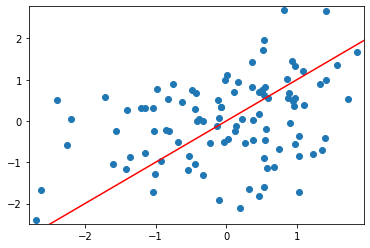

In [8]:
# do not modify the code
x = PCs[:,0][0] * 10
y = PCs[:,0][1] * 10
plt.plot([-x,x], [-y,y], c='red')
plt.scatter(normalized_X[:,0], normalized_X[:,1])
plt.xlim(np.min(normalized_X[:,0]-0.1), np.max(normalized_X[:,0])+0.1)
plt.ylim(np.min(normalized_X[:,1]-0.1), np.max(normalized_X[:,1])+0.1)

## Clustering algorithms

For the second part of this assignment, you will implement two clustering algorithms: K-means and Gaussian mixture model (GMM). Read the instruction carefully, and fill the missing part of the code.

For this assignment, we will use the following dataset `X`.

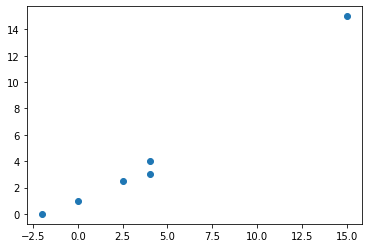

In [9]:
# do not modify the code
X = np.array([[-2,0],[0,1],[2.5,2.5],[4,3],[4,4],[15,15]])
plt.scatter(X[:,0], X[:,1])

### Question3: K-means  (20pt)

Note that the k-means algorithm consists of the following steps:

1. Given initial centroids, compute the pairwise distances between data points and centroids
1. Assign data points to the closest centroid
1. Update the centroids based on the assigned data points
1. Repeat the above step until converge.

For the ease of implementat, we will fix the maximum number of iteration to 10 instead of running the algorithm until convergence. Implement the missing part of the k-means algorithm. 

In [10]:
def kmeans(X, init_centroid, K, max_iter=10):
    """
    Run kmeans and returns the clustering assignment `R` of input `X` and cluster `centroid`s.
    Returned variable `R` has dimensionality of [N]
    The dimensionality of `centroid` is [K x D]
    
    Parameters
    ----------
    X: input parameter [N x D] (where D is the number of input features)
    init_centroid: initial centroid [K x D]
    max_iter: maximum number of iterations performed by the algorithm
    """

    centroid = init_centroid
    num_data, num_dim = X.shape
    
    for i in range(max_iter):
        # Implement: compute pairwise Euclidean distances between data points and centroids
        def euc_dist(dp1, dp2):
            dist = 0.0
            for i in range(len(dp1)):
                dist += ((dp1[i] - dp2[i])**2)
            return dist ** 0.5
        
        # Implement: update clustering assignment for each data point (R)
        R = []
        for i in range(num_data):
            val = float("inf")
            idx = 0
            num = 0
            for ci in centroid:
                dist = euc_dist(X[i], ci)
                if(val > dist):
                    val = dist
                    idx = num
                num += 1
            R = np.append(R, idx)
        
        # Implement: update centroid from the assignment
        num_list = np.zeros(K, dtype=int)
        for i in range(len(R)):
            num_list[int(R[i])] += 1
        new_centroid = np.zeros(shape=(K, num_dim))
        for i in range(num_data):
            for d in range(num_dim):
                new_centroid[int(R[i])][d] += (X[i][d] / num_list[int(R[i])])
        centroid = new_centroid
    
    return R, centroid

Let's plot the result of K-means

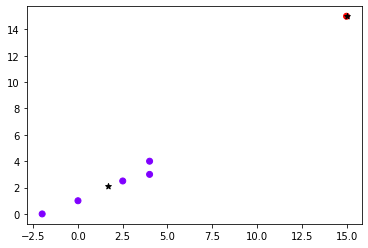

In [11]:
# do not modify the code
K = 2
init_centroid = np.array([[1,1],[3,3]], dtype=float)  #initial centroids

# run kmeans
R, centroid = kmeans(X, init_centroid, K)

# print output
plt.scatter(X[:,0], X[:,1], c=R, cmap=cm.rainbow)
plt.scatter(centroid[:,0], centroid[:,1], marker='*', color='black')
plt.show()

### Question4: Gaussian Mixture Models  (20pt)

Now, we will implement a bit more sophisticated clustering algorithm called Gaussian mixture models. To implement, we define GMM class. Your job is to implement `expectation` and `maximization` methods.

In `expectation` step, you need to compute responsiblity of each data point w.r.t each mixture, and in `maximization` step, you need to update the model paramters including mixture weights, means, and covariances. Read the following skeleton code carefully, and fill the missing parts of the code.

Please do not modify `__init__` and `fit` methods.

In [12]:
class GMM():
    def __init__(self, K, max_iter=10):
        """ (Do not modify this method)
        
        Parameters
        ----------        
        K : number of clusters
        max_iter : maximum number of EM-iteration
        """
        self.K = K
        self.max_iter=max_iter

    def fit(self, X, init_centroid):
        """ (Do not modify this method)
        Run EM algorithm and return the model parameters `pi, mu, covar` 
        as well as the assignment structure `R`
        
        The shape of each output variables is
        R : [N x K]
        pi : [K]
        mu : [K x D]
        covar : [K x D x D]
        
        Parameters
        ----------
        X : dataset, shape [N x D]
        init_centroid : intial centroid, shape [K x D]
        """
        num_data, num_dim = X.shape

        pi = np.ones(self.K)/self.K
        mu = init_centroid
        covar = np.zeros((self.K, num_dim, num_dim))
        
        for i in range(self.K):
            covar[i] = np.eye(num_dim)

        for i in range(self.max_iter):
            R = self.expectation(X, pi, mu, covar)
            pi, mu, covar = self.maximization(X, R)
            
            for i in range(self.K):
                covar[i] += np.eye(num_dim)*1e-3  # avoid singular matrix

        return R, pi, mu, covar

    def expectation(self, X, pi, mu, covar):
        """ Compute expectation step
        
        Parameters
        ----------
        X : dataset, shape [N x D]
        pi : current mixture weights, shape [K]
        mu : current Gaussian means, shape [K x D]
        covar : current Gaussian covariance, shape [K x D x D]
        """
        
        R = np.zeros((X.shape[0], self.K))
        
        ### fill the missing part of this code ###
        for n in range(X.shape[0]):
            for k in range(mu.shape[0]):
                R[n][k] = pi[k] * ss.multivariate_normal(mean=mu[k], cov=covar[k]).pdf(X[n])
                Sum = 0.0
                for j in range(mu.shape[0]):
                    Sum += pi[j] * ss.multivariate_normal(mean=mu[j], cov=covar[j]).pdf(X[n])
                R[n][k] /= Sum
        
        return R

    def maximization(self, X, R):
        """ Compute maximization step
        
        Parameters
        ----------
        X : dataset, shape [N x D]
        R : responsibility, shape [N x K]
        """
        
        ### update mean here - fill the missing part of the code ###
        mu = np.zeros((R.shape[1], X.shape[1]))
        for k in range(R.shape[1]):
            numerator = 0
            denominator = 0.0
            for n in range(X.shape[0]):
                numerator += R[n][k] * X[n]
                denominator += R[n][k]
            mu[k] += (numerator / denominator)
        
        ### update covariance here - fill the missing part of the code ###
        covar = np.zeros((R.shape[1], X.shape[1], X.shape[1]))
        for k in range(R.shape[1]):
            numerator = 0
            denominator = 0.0
            for n in range(X.shape[0]):
                numerator += R[n][k] * np.dot(X[n]-mu[k], np.transpose(X[n]-mu[k]))
                denominator += R[n][k]
            covar[k] += (numerator / denominator)
        
        ### update mixture weight  - fill the missing part of the code ###
        pi = np.zeros(R.shape[1])
        for k in range(R.shape[1]):
            numerator = 0.0
            for n in range(X.shape[0]):
                numerator += R[n][k]
            pi[k] += (numerator / X.shape[0])
        
        return pi, mu, covar

Let's run GMM. We will use the same dataset used in k-means.

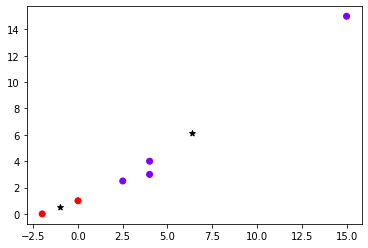

In [13]:
# do not modify the code
K = 2
init_centroid = np.array([[1,1],[3,3]], dtype=float)
# run GMM
gmm = GMM(K, max_iter=10)
R, pi, mu, covar = gmm.fit(X, init_centroid)

# print output
plt.scatter(X[:,0], X[:,1], c=R[:,0], cmap=cm.rainbow)
plt.scatter(mu[:,0], mu[:,1], marker='*', color='black')    
plt.show()

### Question 5: Difference between k-means and GMM (20pt)

Can you find the difference between K-means and GMM? What makes these two algorithms working differently? Provide your answer below.

ANSWER: 

In [14]:
K-means는 어떤 data point를 어떤 클러스터 하나에 무조건 할당한다.
하지만 GMM은 확률을 사용하여 어떤 data point가 어떤 클러스터에 assign될 확률을 이용한다.
또, K-means는 단순히 mean만을 사용하지만, GMM은 mean뿐만 아니라 variancee
이로 인해 K-means를 썼을 때와 GMM을 썼을 때 다른 결과가 나타난다.
예를 들어, 위의 예시에서 (15, 14)와 같은 outlier에 대해 K-means는 제대로 클러스터링하지못하는 반면,
GMM을 이용했을때는 클러스터링이 잘 이루어졌음을 확인할 수 있다.

SyntaxError: invalid syntax (Temp/ipykernel_2920/1571289192.py, line 1)